# Relevance Classification Task

#### Team Members
Vishesh Kishore 202392175 \
Niskarsha Ghimire, 202390729 \
Nishant Anilkumar Khadse, 202384013 \
Abdulaziz Sultan F Alsahli, 202354056  

# 1. Overview

The assignment involved dealing with text dataset with articles displayed based on user's information need with corresponding label as relevant or non-relevant. We initially tried to visualize the words from the articles using WordCloud plot and later applying Tf-Idf Vectorizer techniques on text. Later tokenizers was performed on the articles, followed by simple machine learning baseline model and deep learning models. As a conclusive note, exploratory data analysis including tokenization and handling the text data with appropriate embedding is the key takeaway from the assignment. 

### Importing Libraries and Packages

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import _stop_words
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Loading training dataset
data = pd.read_parquet('relevance_train.parquet', engine='pyarrow')

### Exploratory Data Analysis

In [3]:
# Shape of the data
data.shape

(19758, 10)

In [4]:
data.sample(5)

,doc_id,judgement,author,body,byline,title,topic_id,description,narrative,topic_title
14400,ba18fd9c-412e-11e5-8e7d-9c033e6745d8,0,Editorial Board,<p>AFRICA HAS reported some genuinely good new...,By Editorial Board,The end of polio in Africa?,801,Find documents that describe religious objecti...,Religious beliefs have caused some groups in A...,Africa polio vaccination
1893,a35ed0226183af084804de2fd9c7ae58,0,Fritz Hahn,<p>The best place to drink beer is obviously a...,By Fritz Hahn,"Beer tastes best when it’s freshest, so try th...",347,The spotted owl episode in America highlighted...,"A relevant item will specify the country, the ...",Wildlife Extinction
18090,f69af883a3326f18c2f00595b2e137da,0,Doug Feaver,"<p>The <a href=""http://www.washingtonpost.com/...",By Doug Feaver,A flurry of opinions about Zimmerman trial,808,Find documents that contain the verdict reache...,"To be relevant, a document must explicitly men...",Boston marathon bombing verdict
12109,23a433a550ff7a0ab7a79c19b8935149,0,Josephine McKenna | Religion News Service,"<p>VATICAN CITY (RNS) Bill O’Reilly, the Fox N...",By Josephine McKenna | Religion News Service,Bill O’Reilly meets Pope Francis at the Vatican,445,What other countries besides the United States...,"To be relevant, a document must indicate eithe...",women clergy
12537,018ed266f31927b5b66cff809d07a104,0,Sarah Kaplan,"<p>For the first time, scientists have grown a...",By Sarah Kaplan,"Scientists create a part-human, part-pig embry...",626,Find reports of human stampedes that have resu...,Documents that mention people being killed by ...,human stampede


In [5]:
data['body'][0]

'<p>More than 60 years ago, a fair-skinned Irish politician\xa0named Sally Mulready was born into a home for unwed mothers called St. Patrick’s. It sat on a road named\xa0Navan in Dublin, and Mulready\xa0was one of four siblings born there. Her brother John never made it out of St. Pat’s. Like hundreds of other babies born into an Irish\xa0homes for “fallen women,” John\xa0died in 1947. He was two months old.</p>\\n<p>“Inanition,” his death record read, <a href="http://www.rte.ie/news/primetime/2014/0609/622696-prime-time-anatomy-of-a-scandal/">according to RTE News</a>. “Failure to thrive.”</p>\\n<p>But RTE News <a href="http://www.rte.ie/news/primetime/2014/0609/622696-prime-time-anatomy-of-a-scandal/">said</a>\xa0the\xa0record carried a mystery. John for some reason wasn’t buried until 1950 — three years after his death. The oddity was first discarded as a clerical error.</p>\\n<p>But it wasn’t. John’s records had\xa0the designation “AS,” or\xa0“anatomical study.” His infant remains

In [6]:
data['description'][1000]

'A relevant document would discuss the frequency of vicious black bear attacks worldwide and the possible causes for this savage behavior.'

In [7]:
data['narrative'][1000]

'It has been reported that food or cosmetics sometimes attract hungry black bears, causing them to viciously attack humans. \nRelevant documents would include the aforementioned causes as well as speculation preferably from the scientific community as to other possible causes of vicious attacks by black bears.\n A relevant document would also detail steps taken or new methods devised by wildlife officials to control and/or modify the savageness of the black bear.'

In [8]:
data['topic_title'][1000]

'Black Bear Attacks'

In [9]:
# Percentage of relevant and non-relevant articles
data['judgement'].value_counts(normalize=True).mul(100).round(3).astype(str) + '%'

0    84.285%
1    15.715%
Name: judgement, dtype: object

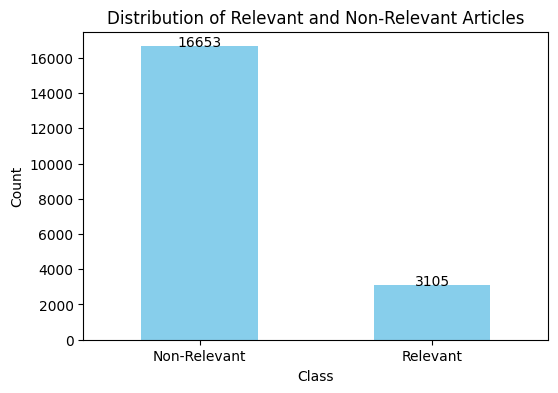

In [10]:
labels = {0: 'Non-Relevant', 1: 'Relevant'}
value_count = data['judgement'].map(labels).value_counts()

# Plotting
plt.figure(figsize=(6, 4))
bars = value_count.plot(kind='bar', color='skyblue')
plt.title('Distribution of Relevant and Non-Relevant Articles')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Relevant', 'Relevant'], rotation=0)
# plt.show()

# Annotating the bars with count values
for i, count in enumerate(value_count):
    bars.text(i, count + 0.1, str(count), ha='center')

plt.show()


In [11]:
data.isnull()
# data.isnull().values.any()

data.isnull().sum()

doc_id            0
judgement         0
author         1573
body             69
byline         1508
title             0
topic_id          0
description       0
narrative         0
topic_title       0
dtype: int64

In [12]:
# removing null values from body column
data = data.dropna(subset=['body'])

In [13]:
# Dropping columns that are not relevant for pre-processing the data
data.drop(columns=['doc_id', 'topic_id', 'byline'], inplace=True)

In [14]:
data['author'].nunique()

3363

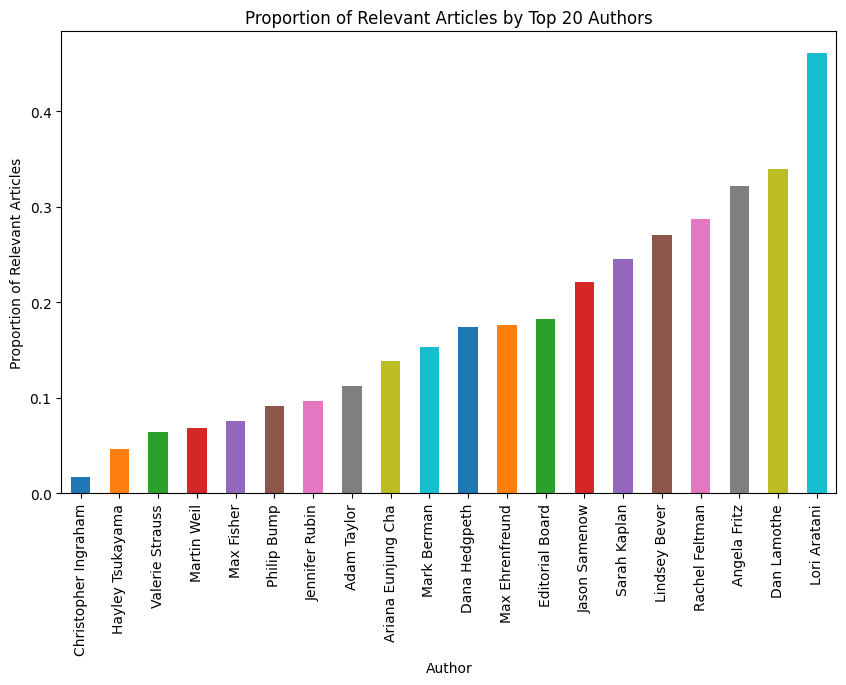

In [15]:
top_20_authors = data['author'].value_counts().nlargest(20).index
authors = data[data['author'].isin(top_20_authors)]

author_relevance = authors.groupby('author')['judgement'].mean().sort_values()

colors = sns.color_palette('tab10', len(author_relevance))

plt.figure(figsize=(10, 6))
author_relevance.plot(kind='bar', color=colors)
plt.title('Proportion of Relevant Articles by Top 20 Authors')
plt.xlabel('Author')
plt.ylabel('Proportion of Relevant Articles')
plt.xticks(rotation=90)
plt.show()


### Pre-Processing the text data

In [16]:
#Importing libraries
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Function to perform embedding techniques
def text_cleaning(text):
    
    # Remove html tags using BeautifulSoup
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()

    # Tokenize the text into words
    tokens = word_tokenize(text)

    # Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Perform stemming using Porter Stemmer algorithm
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]

    # Join the tokens back into a single string
    processed_text = ' '.join(stemmed_tokens)

    # Return the processed text
    return processed_text

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/visheshkishore/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/visheshkishore/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### WordCloud to Analyize article relevance

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def wordcloud(text):

    # Generate a word cloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


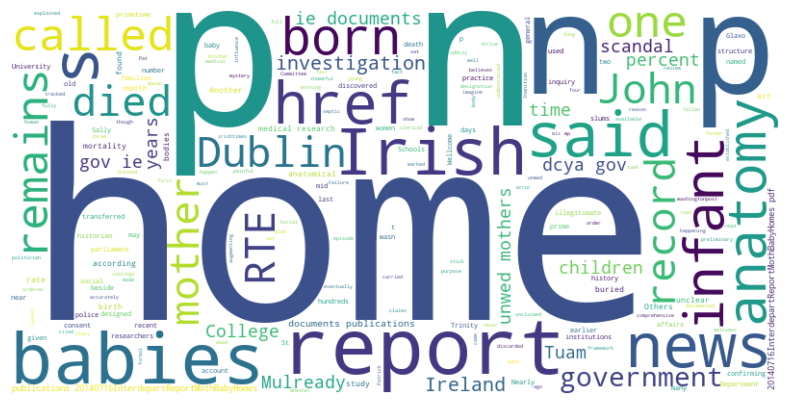

In [18]:
wordcloud(data['body'][0])

In [19]:
data['body'][0]

'<p>More than 60 years ago, a fair-skinned Irish politician\xa0named Sally Mulready was born into a home for unwed mothers called St. Patrick’s. It sat on a road named\xa0Navan in Dublin, and Mulready\xa0was one of four siblings born there. Her brother John never made it out of St. Pat’s. Like hundreds of other babies born into an Irish\xa0homes for “fallen women,” John\xa0died in 1947. He was two months old.</p>\\n<p>“Inanition,” his death record read, <a href="http://www.rte.ie/news/primetime/2014/0609/622696-prime-time-anatomy-of-a-scandal/">according to RTE News</a>. “Failure to thrive.”</p>\\n<p>But RTE News <a href="http://www.rte.ie/news/primetime/2014/0609/622696-prime-time-anatomy-of-a-scandal/">said</a>\xa0the\xa0record carried a mystery. John for some reason wasn’t buried until 1950 — three years after his death. The oddity was first discarded as a clerical error.</p>\\n<p>But it wasn’t. John’s records had\xa0the designation “AS,” or\xa0“anatomical study.” His infant remains

In [20]:
data['description'][0]

'Pertinent documents will reflect the fact that women continue to be poorly represented in parliaments across the world, and the gap in political power between the sexes is very wide, particularly in the Third World.'

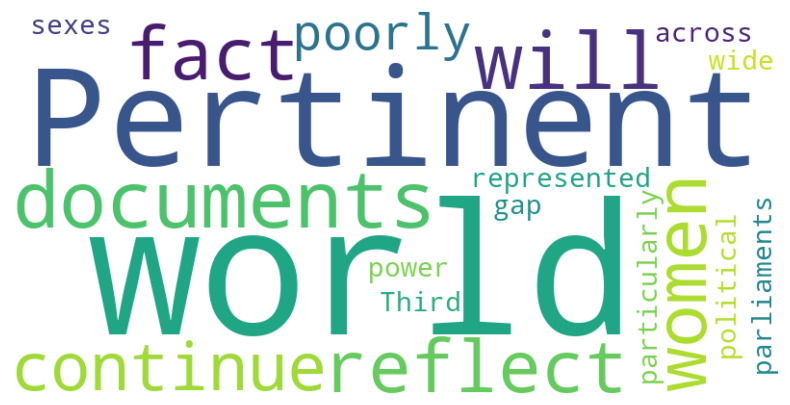

In [21]:
wordcloud(data['description'][0])

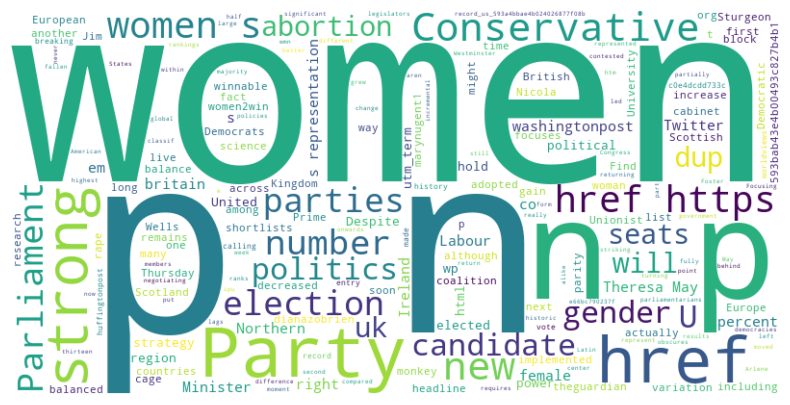

In [22]:
wordcloud(data['body'][6])

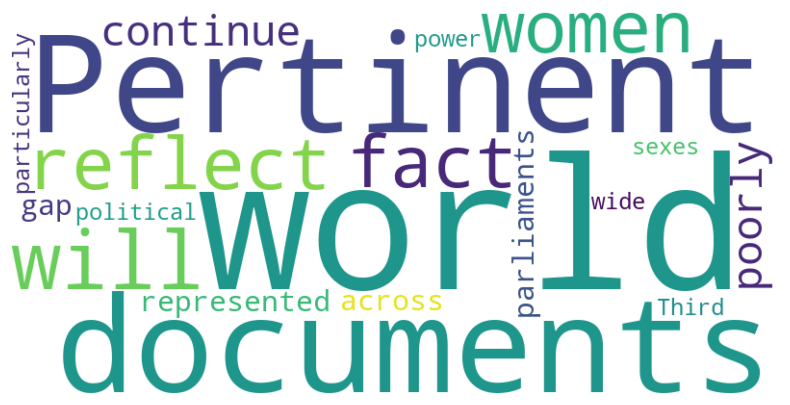

In [23]:
wordcloud(data['description'][6])

It can be observed from the wordcloud plot above that the content of the article (body) contains words that seem relevant to user's information need (description). The article is somewhat related about political elections and the description of the also represents the same. 

It can be concluded that wordcloud gave us qualitative understanding of the language used in relevant and non-relevant articles.

# 2. Methods

To kickstart the project, Exploratory Data Analysis was performed on the training dataset to get the overall impression of the given data. As per the dataset description, it consists of a news paper article  (doc_id, author, body, byline, title) and a description of what a person was looking for (i.e. their information need (see fields topic_id, description, narrative and topic_title).

After performing functions to apply EDA, we observed that there exist imbalance in the data with not-relevant articles being 84% of the entire training data. That is, most of the articles are not relevant to the user's information need. We considered this class imbalance when interpreting the performance of the classification model. For time being, we will proceed with the data as it is and monitor the model performance with different parameters. It was observed that there are null values in training dataset. The columns that has null values are ['author', 'body', 'byline']. Since this is the text dataset, it makes sense to remove those instances rather than imputing some random text values. The graph was plotted representing the proportion of relevant articles authored by top 20 authors from the training data. There are 3365 unique artists present in the training data, therefore we plot the graph for only top 20 authors to increase readability.

After carefully exploring the text data, the process of removing html tags from body, lower casing, removing stopwords and stemming was applied on 1st instance of the training dataset via python function. Furthermore, wordcloud for the same instance was plotted. It is observed from the wordcloud that the user's information need (description) do not seem relevant to the content of the article (body). As observed from the content of the wordcloud, the article somehow seems something related to Ireland whereas the description revolves aroung Woman in Parliament. Conclusively, the article is not relevant as it was labelled in the data also.

Furthermore, the columns ['body', 'title', 'description', 'narrative'] were combined as a single column ['combined_text']. Later on, TF-IDF was applied on the 'combined_text' column to produce a numerical vector representation of the word. TF-IDF was performed to minimize the weighting of frequent terms while making infrequent terms have a higher impact.

The TF-IDF vector matrix was considered as independent variable (X) and the judgement column was taken as the target variable. The data was segmented into training and validation set to apply deep learning models. 


### Applying Text Cleaning function on training dataset

In [24]:
# Applying text cleaning function to each column of the training dataset
data[['body', 'title', 'description', 'narrative']] = data[['body', 'title', 'description', 'narrative']].applymap(text_cleaning)

/var/folders/m_/d9ytr15j7xs96j0pg4x6z7dm0000gn/T/ipykernel_89386/860189693.py:17: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


In [25]:
data['combined_text'] = data['body'] + data['description'] + data['narrative'] + data['title']

In [26]:
data.head(3)

,judgement,author,body,title,description,narrative,topic_title,combined_text
0,0,Terrence McCoy,60 year ago fair-skin irish politician name sa...,report irish babi home document use infant med...,pertin document reflect fact women continu poo...,pertin document relat issu discuss lack repres...,Women in Parliaments,60 year ago fair-skin irish politician name sa...
1,0,Brian McNoldy,hurrican fred form weekend far eastern atlant ...,hurrican fred fountain ‘ first ’ atlant ocean,pertin document reflect fact women continu poo...,pertin document relat issu discuss lack repres...,Women in Parliaments,hurrican fred form weekend far eastern atlant ...
2,0,Editorial Board,eight year ago month inspir movement took hold...,ukrain slide away democraci,pertin document reflect fact women continu poo...,pertin document relat issu discuss lack repres...,Women in Parliaments,eight year ago month inspir movement took hold...


In [167]:
# Combining columns into a single column 'combined_text'
data_new = data[['combined_text', 'judgement']].copy()

In [168]:
data_new.sample(5)

,combined_text,judgement
24212,u.s. govern brought crimin charg three alleg m...,0
21787,tone tenor obama white hous sinc democrat suff...,0
3902,metro ’ largest union wednesday distanc nation...,1
9372,elderli woman suffer critic injuri wednesday h...,0
5745,\n could use fun rgiii news today rooki quarte...,0


### Performing TF-IDF Vectorizer

In [169]:
#Using TF-IDF to form vector of words
articles = list(data_new['combined_text'])
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features = 20000) 
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(articles)
articles = tfidf_vectorizer_vectors.toarray()

### Separating features and target variables

In [170]:
X = articles
Y = data['judgement']

In [171]:
print(X.shape, Y.shape)

(19689, 20000) (19689,)


In [172]:
# Using validation techniques to split the dataset
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)

(13782, 20000) (13782,)
(5907, 20000) (5907,)


# 3. Models

## 3.1 Stochastic Gradient Descent

The dataset containes 20000 features in the form of matrix vector. Using a standard distance based model would be computationally expensive, therefore SGD Classfier was chosen as a Machine Learning baseline model. SGD is computationally efficient, especially for high-dimensional feature spaces which makes sense to use it in a text classification problem. 
To validate the model performance, K-Fold cross validation techniques was used with 10 folds using precision as the evaluation metric.

In [173]:
from numpy import mean, std
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score


# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#create SGD Model
lr_clf = SGDClassifier(loss='log_loss', random_state=42)

# evaluate model
scores = cross_val_score(lr_clf, X, Y, scoring='precision', cv=cv, n_jobs=-1)

# report performance
print('Mean precision score for 10 fold cross validation: %.3f (%.3f)' % (mean(scores), std(scores)))


Mean precision score for 10 fold cross validation: 0.824 (0.032)


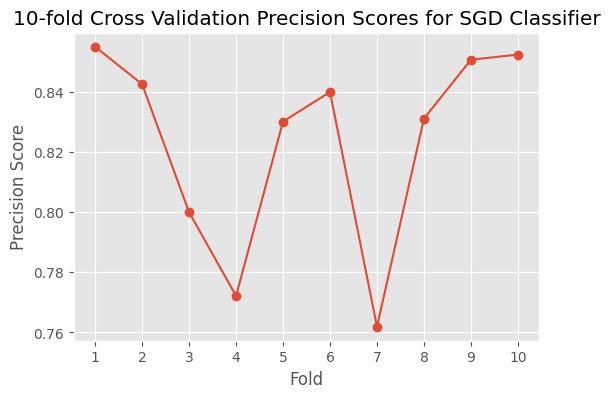

In [174]:
# Plotting the precision scores
plt.figure(figsize=(6, 4))
plt.plot(np.arange(1, 11), scores, marker='o', linestyle='solid')
plt.title('10-fold Cross Validation Precision Scores for SGD Classifier')
plt.xlabel('Fold')
plt.ylabel('Precision Score')
plt.grid(True)
plt.xticks(np.arange(1, 11))
plt.show()

An average precision score of 82.4% was observed with 10 Fold cross-validation method. Considering SGD Classfier as the baseline model for our methodology, we then apply neural network approach to predict relevant text. 

## 3.2 Three Layer Neural Network Baseline

In [175]:
# Function to create 3 layered NN
def three_layer_nn(neurons):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(20000,), activation='relu'))
    model.add(Dense(500, activation='relu'))
    model.add(Dense(1, activation = 'sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['precision'])
    return model


In [176]:
list_of_neurons = [100, 250, 500, 750]

precisions = []

for neurons in list_of_neurons:
    print(f'\nTraining model with {neurons} neurons in hidden layer')
    model = three_layer_nn(neurons)
    model.fit(X_train, Y_train, epochs=10, batch_size=500, validation_data=(X_val, Y_val), shuffle=True)
    _, precision = model.evaluate(X_val, Y_val)
    precisions.append(precision)

    print('Precision: %.2f' % (precision*100))




Training model with 100 neurons in hidden layer


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.5723 - precision: 0.2013 - val_loss: 0.4084 - val_precision: 0.0000e+00
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.3779 - precision: 0.0000e+00 - val_loss: 0.3519 - val_precision: 0.0000e+00
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2877 - precision: 0.4036 - val_loss: 0.3142 - val_precision: 0.7416
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.1982 - precision: 0.8963 - val_loss: 0.3217 - val_precision: 0.6404
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0985 - precision: 0.9201 - val_loss: 0.4033 - val_precision: 0.6548
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0475 - precision: 0.9526 - val_loss: 0.4600 - val_precision: 0.6099
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0279 - precision: 0.9736 - val_loss: 0.5298 - val_precision: 0.6245
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0221 - precision: 0.9747

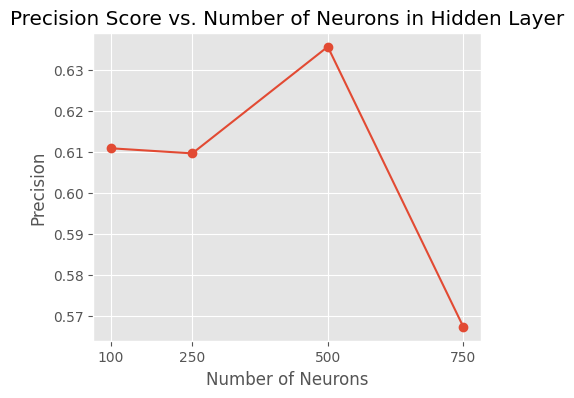

In [177]:
# Plotting
plt.figure(figsize=(5, 4))
plt.plot(list_of_neurons, precisions, marker='o')
plt.title('Precision Score vs. Number of Neurons in Hidden Layer')
plt.xlabel('Number of Neurons')
plt.ylabel('Precision')
plt.xticks(list_of_neurons)
plt.grid(True)
plt.show()

It is observed from the plot that 100 neurons give best precision score. Although we could have explored high number of neurons but that would be computationally expensive.

In [178]:
# Fitting the model with 100 neurons 
model = three_layer_nn(100)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['precision'])
model.fit(X_train, Y_train, epochs=10, batch_size=100)

#Loss precision on training set
loss, precision = model.evaluate(X_train, Y_train, verbose=False)
print("Training Precision: {:.4f}". format(precision))

# loss precision on testing set
loss, precision = model.evaluate(X_val, Y_val, verbose=False)
print("Testing Precision: {:.4f}". format(precision))


Epoch 1/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.4614 - precision: 0.2049
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2171 - precision: 0.8165
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0844 - precision: 0.9203
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0407 - precision: 0.9572
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0237 - precision: 0.9781
Epoch 6/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0157 - precision: 0.9853
Epoch 7/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0129 - precision: 0.9874
Epoch 8/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0115 - precision: 0.9866
Epoch 9/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0099 - precision: 0.9903
Epoch 10/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0095 - precision: 0.9887
Training Precision: 0.9800
Testing Precision: 0.5690


In [180]:
print(model.summary())

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_98 (Dense)                │ (None, 100)            │     2,000,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 500)            │        50,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,153,305 (23.47 MB)

 Trainable params: 2,051,101 (7.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,102,204 (15.65 MB)

None


Three layered model with feed forward architecture was applied using a python function with number of neurons as the argument.  The first layer is densely connected with ReLu activation function having input shape of 20000. The hidden layer contains 500 neurons, enabling the network to learn more complex patterns. The final layer is the output layer with sigmoid as activation function suitable for binary classification. 

The range of neurons applied are [100, 250, 500, 750] withh 10 epochs, validating the model on validation set. The precision vs neuron plot showed how changing the number of neurons changed the performance of the model. As a result of the graph, we chose to go with 100 neurons in the input layer. 

Precision score on validation set with 100 neurons in input layer: 56.90%

## 3.3 Deep Layer Neural Network with Embedding Layer

Let's now extend the implementation of neural network by using deep layers using Embedding. 
The section implements the Embedding Layer in Keras taking calculated integers of words mapping it to dense vector of embedding. This would involve using both Word Embedding and pre-trained word embeddings. However, word embedding collect more information into fewer dimensions. 

In [361]:
# articles variables with text
data_new
articles = data_new['combined_text'].copy()

In [362]:
# Separating training and validation/test set
articles_train, articles_test, y_train, y_test = train_test_split(articles, Y, test_size=0.25, random_state=42)

Here, we are using Tokenizer class in Keras to implement tokenisation of articles. Each integers maps to a dictionary that encodes the entire corpus, with keys in the dictionary being vocabulary term themselves. These corpus of embedded words will then be passed to Embedding layer in Keras.

In [363]:
# Tokenising the articles 
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(articles_train)

# separetly tokenizing train and test articles
X_train = tokenizer.texts_to_sequences(articles_train)
X_test = tokenizer.texts_to_sequences(articles_test)

vocab_size = len(tokenizer.word_index) + 1

The code below appends 0 in text sequence having different length of words in most cases. To overcome this problem of variable length, we used pad_sequence() which pads the sequence of words with zero.

In [184]:
from keras.preprocessing.sequence import pad_sequences

# Maximum length of article. This is computational expensive, hence maxlen is choosen as 1000.
maxlen = 1000

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

We now have an Embedding layer with input_dim as size of the vocabulary, and output_dim as the embedding_dim which we have chosen 50 as the base value for this model. 

### Effect of adding more hidden layers on model performance
In this section, we will try and experiment the performance of the model by varying the number of hidden layers. 

In [185]:
from keras import layers

embedding_dim = 50

# Function to create a model with variable number of layers
def create_model(num_layers):
    model = Sequential()

    # Embedding layer with input and and output dimensions
    model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, input_shape=(1000,)))
    model.add(layers.Flatten())
    model.add(Dense(500, activation='sigmoid', input_shape=(1000,)))
    for _ in range(num_layers):
        model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['precision'])
    return model

In [186]:
# Number of dense layers: 1 to 5
num_layers_range = range(1, 6)

precision_scores = []

# Fitting the model with variable number of layers to check the performance
for num_layers in num_layers_range:
    model = create_model(num_layers)
    history = model.fit(X_train, y_train,
                    epochs=5,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=500)
    loss, precision = model.evaluate(X_test, y_test, verbose=False)
    precision_scores.append(precision)


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


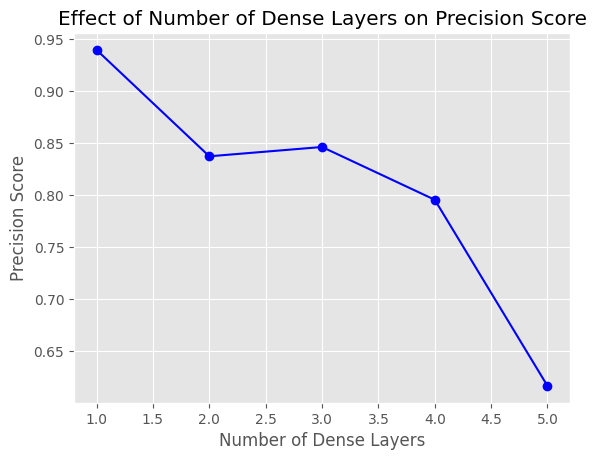

In [188]:
# Plot the result to check performace. Precision vs Number of Layers
plt.plot(num_layers_range, precision_scores, marker='o', color = 'blue')
plt.xlabel('Number of Dense Layers')
plt.ylabel('Precision Score')
plt.title('Effect of Number of Dense Layers on Precision Score')
plt.grid(True)
plt.show()

The graph shows the precision score across number of hidden layers ranging from 1-6 with 100 neurons in each layers having ReLu as the activation function. It can be depicted from the graph that adding more and more hidden layers does not necessarily increase the model performance. Only one hidden layers are enough to give a good precision score. 

### Exploring Different activation functions

In [189]:
# Function to interpret different activation function

def build_model(activation_func):
    embedding_dim = 50

    model = Sequential()
    model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, input_shape=(1000,)))
    model.add(layers.Flatten())
    model.add(layers.Dense(500, activation=activation_func))
    model.add(layers.Dense(100, activation=activation_func))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['precision'])

    return model

In [190]:
# List of activations
activation_func = ['sigmoid', 'relu', 'tanh', 'softmax']
precision_scores_train = []
precision_scores_test = []


# Function to test the model
for act_func in activation_func:
    model = build_model(act_func)
    history = model.fit(X_train, y_train,
                    epochs=5,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=500)
    _, precision_train = model.evaluate(X_train, y_train, verbose=False)
    _, precision_test = model.evaluate(X_test, y_test, verbose=False)
    precision_scores_train.append(precision_train)
    precision_scores_test.append(precision_test)


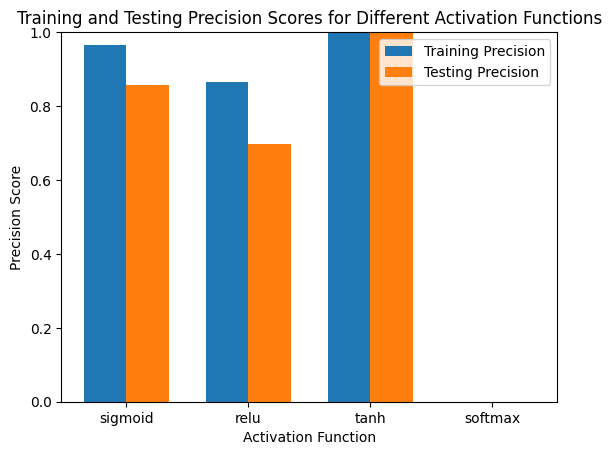

In [52]:
# Plotting the bar graph
bar_width = 0.35

index = np.arange(len(activation_func))

plt.bar(index, precision_scores_train, bar_width, label='Training Precision')
plt.bar(index + bar_width, precision_scores_test, bar_width, label='Testing Precision')

plt.xlabel('Activation Function')
plt.ylabel('Precision Score')
plt.title('Training and Testing Precision Scores for Different Activation Functions')
plt.xticks(index + bar_width / 2, activation_func)
plt.legend()
plt.ylim(0, 1)  # Set y-axis limit to ensure scores are between 0 and 1
plt.show()


There are different activation functions to experiment around to optimize the model performance. To overcome the problem of overfitting, we need to make sure the training and testing precision are as close as possible. As observed from the graph above, we can see that tanH activation is giving best results. The training set results are comparable to sigmoid activation function, but the results in testing dataset are much better. Even relu activation function is giving good results in training but performing poorly in testing set. 

Below, we have prepared a model with tanh activation function in the hidden layer. 

In [219]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, input_shape=(1000,)))
model.add(layers.Flatten())
model.add(layers.Dense(500, activation='tanh'))
model.add(layers.Dense(100, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['precision'])

model.summary()

Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_33 (Embedding)        │ (None, 1000, 50)       │     6,771,350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 50000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_147 (Dense)               │ (None, 500)            │    25,000,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_148 (Dense)               │ (None, 100)            │        50,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_149 (Dense)               │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,822,051 (121.39 MB)

 Trainable params: 31,822,051 (121.39 MB)

 Non-trainable params: 0 (0.00 B)

In [254]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['precision']
    val_acc = history.history['val_precision']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

Training precision: 0.9830
Testing precision:  0.9000


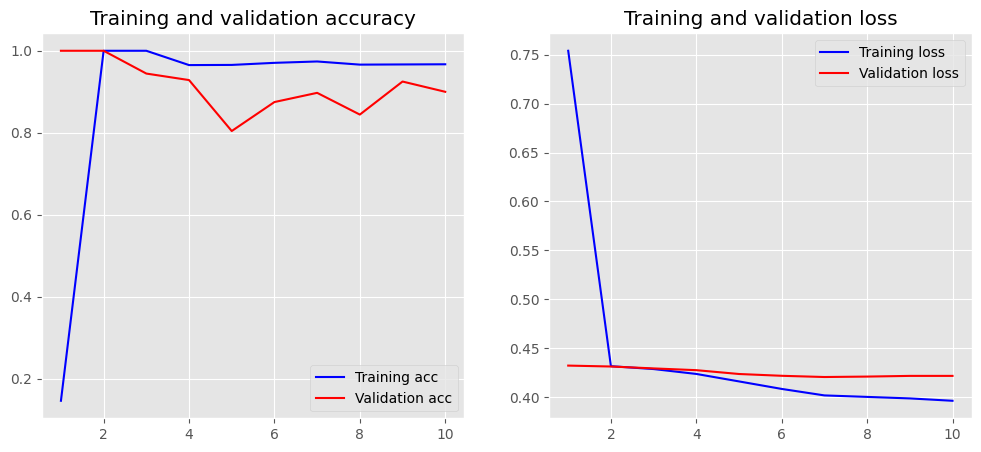

In [221]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=500)

loss, precision = model.evaluate(X_train, y_train, verbose=False)
print("Training precision: {:.4f}".format(precision))
loss, precision = model.evaluate(X_test, y_test, verbose=False)
print("Testing precision:  {:.4f}".format(precision))
plot_history(history)

As observed from the above plot, the model is giving 98.3% precision on training set and 90% on testing set. We also tried different activation function but tanh is giving good results. The tanh function outputs values between -1 and 1 giving better numerical stabiliy during training, like in the case of deep neural network. 

### Deep Neural Network using Pre-trained Embedding - GloVe

In this section, we implemented pre-computed embedding space provided by GloVe which achieves embedding by matrix factorizaion. An alternative is Word2Vec, but GloVe is faster to compute. GloVe embeddings are trained on large corpus using unsupervised learning techniques. Pre-trained GloVe are available in various dimensions (50, 100, 200), trained on multiple text sources like Wikipedia, Twitter, etc. 

In [222]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

The GloVe file loads embedding matrix where each line in the file starts with the word and is followed by the embedding vector for the particular word.

In [223]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix('glove.6B.200d.txt', tokenizer.word_index, embedding_dim)

In [224]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.45646732187820743

In [225]:
model = Sequential()

embedding_layer = layers.Embedding(vocab_size, embedding_dim, input_shape=(1000,), trainable=False)
model.add(embedding_layer)

embedding_layer.set_weights([embedding_matrix])

model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(500, activation='tanh'))
model.add(layers.Dense(100, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['precision'])
model.summary()

/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_34 (Embedding)        │ (None, 1000, 50)       │     6,771,350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_13         │ (None, 50)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_150 (Dense)               │ (None, 500)            │        25,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 100)            │        50,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,847,051 (26.12 MB)

 Trainable params: 6,847,051 (26.12 MB)

 Non-trainable params: 0 (0.00 B)

When using pre-trained embedding, we can either choose to allow the embedding to be updated during training or only use the resulting embedding vectors as they are. The model above is build without updating the embedding while training. 

Training precision: 0.8295
Testing precision:  0.7647


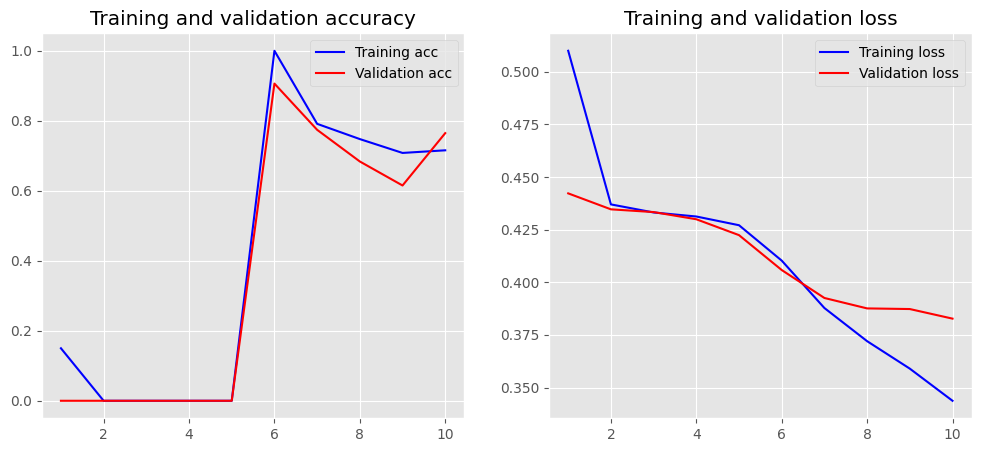

In [226]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=500)

loss, precision = model.evaluate(X_train, y_train, verbose=False)
print("Training precision: {:.4f}".format(precision))
loss, precision = model.evaluate(X_test, y_test, verbose=False)
print("Testing precision:  {:.4f}".format(precision))
plot_history(history)


Training the model while updating the embedding simultaneously. (trainable=True)

In [227]:
model = Sequential()

embedding_layer = layers.Embedding(vocab_size, embedding_dim, input_shape=(1000,), trainable=True)
model.add(embedding_layer)

embedding_layer.set_weights([embedding_matrix])


model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(500, activation='tanh'))
model.add(layers.Dense(100, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['precision'])
model.summary()

Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_35 (Embedding)        │ (None, 1000, 50)       │     6,771,350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_14         │ (None, 50)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 500)            │        25,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 100)            │        50,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_155 (Dense)               │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,847,051 (26.12 MB)

 Trainable params: 6,847,051 (26.12 MB)

 Non-trainable params: 0 (0.00 B)

Training precision: 0.7733
Testing precision:  0.6360


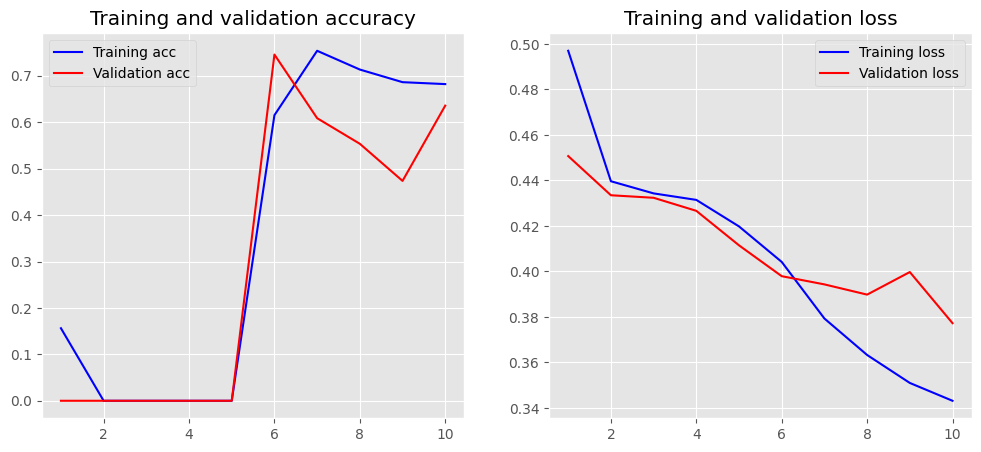

In [228]:
deepNN = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=500)

loss, precision = model.evaluate(X_train, y_train, verbose=False)
print("Training precision: {:.4f}".format(precision))
loss, precision = model.evaluate(X_test, y_test, verbose=False)
print("Testing precision:  {:.4f}".format(precision))
plot_history(deepNN)


As observed from the precision scores from training with model with out without pre-trained embeddings and updates during training, it can be depicted that the model give almost similar performace while using pre-computed embedding using GloVe and also updating the embeddings during training. The only difference observed is the difference in training and testing precision scores, which is quite less when using GloVe. It is more effective to allow embeddings to be trained. Since our dataset was quite large, it helped boost the training process much faster than without.

## 3.4 Complex Model - Convolutional Neural Network

Complex models like Convolutional Neural Network can be used for sequential text data, along with the image classification. Before applying CNN, we have converted words into numerical representation using word embedding techniques. CNN apply convolution filters across input text, extracting features from the text sequence. Each filter can produce a feature matrix by convolving with input sequence, capturing important information about the text sequence. 

In [367]:
# Tokenising the articles 
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(articles)

vocab_size = len(tokenizer.word_index) + 1

In [368]:
# Separating training and validation/test set
articles_train, articles_test, y_train, y_test = train_test_split(articles, Y, test_size=0.25, random_state=42)

In [369]:
# separetly tokenizing train and test articles
X_train = tokenizer.texts_to_sequences(articles_train)
X_test = tokenizer.texts_to_sequences(articles_test)

In [370]:
from keras.preprocessing.sequence import pad_sequences

# Maximum length of article. This is computational expensive, hence maxlen is choosen as 1000.
maxlen = 1000

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [373]:
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_shape=(1000,)))
model.add(layers.Conv1D(128, 5, activation='tanh'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['precision'])
model.summary()



Model: "sequential_72"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_61 (Embedding)        │ (None, 1000, 50)       │     7,873,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_21 (Conv1D)              │ (None, 996, 128)       │        32,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_35         │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_203 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_204 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,913,899 (30.19 MB)

 Trainable params: 7,913,899 (30.19 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 661ms/step - loss: 0.5083 - precision: 0.0000e+00 - val_loss: 0.4213 - val_precision: 0.0000e+00
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 661ms/step - loss: 0.4108 - precision: 0.0000e+00 - val_loss: 0.4001 - val_precision: 0.0000e+00
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 659ms/step - loss: 0.3889 - precision: 0.1613 - val_loss: 0.3809 - val_precision: 1.0000
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 670ms/step - loss: 0.3519 - precision: 0.8588 - val_loss: 0.3599 - val_precision: 0.8295
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 685ms/step - loss: 0.3145 - precision: 0.8456 - val_loss: 0.3349 - val_precision: 0.7900
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 695ms/step - loss: 0.2503 - precision: 0.9061 - val_loss: 0.3127 - val_precision: 0.7423
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 687ms/step - loss: 0.1720 - precision: 0.9427 - val_loss: 0.3175 - val_precision: 0.7235
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 691ms/step - loss: 0.0917

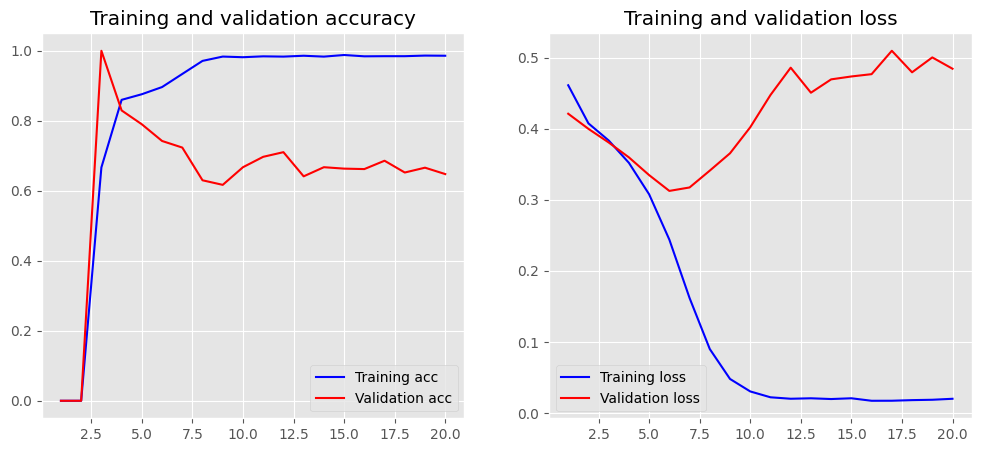

In [374]:
# Fitting the model 
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=500)

loss, precision = model.evaluate(X_train, y_train, verbose=True)
print("Training precision: {:.4f}".format(precision))
loss, precision = model.evaluate(X_test, y_test, verbose=True)
print("Testing precision:  {:.4f}".format(precision))
plot_history(history)

We can observe that ~ 90% accuracy seems to be tough hurdle to overcome with this data set and a CNN might not be well equipped. The reason for such a plateau might be that:

1. There are not enough training samples
2. The data set is highly imbalance with most of the articles being relevant. 
3. Missing focus on tweaking the hyperparameters
CNNs work best with large training sets where they are able to find generalizations. 


# 4. Results
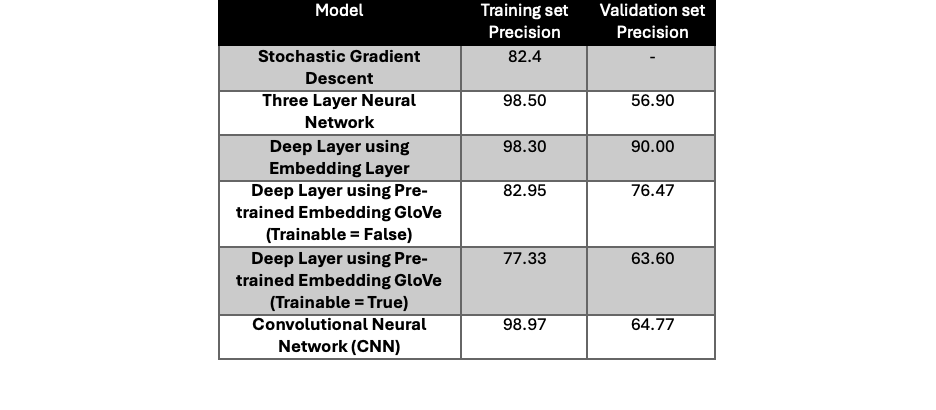

The data set was highly imbalanced considering that there were only 15% of the relevant articles. Since, this is a text classificaiton problem, we tried shuffling the dataset when fitting the model on the data to overcome the imbalance as much as we could. 
In order to start with the machine learning baseline model, we used <b>Stochastic Gradient Descent</b> since because of the large set of features we obtained after performing Tf-Idf vectorizer. We also tried other distance based model like Logistic Regression but it was computationally expensive. However, we performed 10-fold cross validation to validate the model performace.

<b> Three Layered Neural Network</b> with varying neurons and different activation functions was tried. This gave a significant rise in precision score but could not perform well in validation set. <br>
<b>Range of neurons</b> [100, 250, 500, 750] <br> 
<b>Activation functions</b> [ReLu, tanH, Sigmoid]

<b>Deep Layer with Embedding using GloVe</b> was also tried with different parameters. It was observed that as we keep on adding more layers, the precision score starts dropping. Deep layer with GloVe Embedding was tried with different parameters. (Trainable = True/False). 

We tried applying <b> Convolutional Neural Network (CNN) </b> by adding a Conv1D layer in between Embedding layer and GlobalMaxPool1D layer. The results were expectedly low in validation set due to overfitting. We tried reducing the number of filters and tried different relu and sigmoid activation but the result were similar. 


The one thing that is not included in the report but we tried is <b>BERT - Bidirectional Encode Representation Transformer.</b> It uses a multi-layer bidirectional transformer encoder to represent the input text in a high dimensional space. We tried creating a BERT embedding layer by importing the BERT model from hub.KerasLayer. We then create a BERT vocab_file in the form a numpy array. Lateron, we set the text to lowercase and finally we pass our vocab_file and do_lower_case variables to the Tokenizer object. When we tried building the model, the estimated time for one epoch was ~ 10 hours without the GPU. However, due to this time and resource constraint we could not implement BERT.


# 5. Summary

<b>Recommended Model: </b> According to the techniques that we tried and performed on this data set, we would recommend a Deep Layer Neural Network with 1 layer having 500 neurons with tanH activation function. The pre-processing should be performed and an Embedding Layer with before that should be added. Another Dense layer of 100 neurons followed by a output layer having sigmoid as the activation function. The same model can also be applied using pre-trained technique like GloVe Embedding.

<b> Future Work </b> If the data set could have been more balanced, we would be able to achive more precision score using complex model CNN. Furthermore, CNN could have been explored using hyperparameter tuning with different number of filters and activation functions. 

<b>Kaggle Score from Deep Learning Model with GloVe: 0.87305</b>

### Pre-Processing the Test Dataset

In [257]:
test_data = pd.read_parquet('relevance_test.parquet')

In [258]:
test_data.shape

(4884, 9)

In [259]:
test_data.head(3)

,doc_id,author,body,byline,title,topic_id,description,narrative,topic_title
2050,0002e4f816c863e4b912d6d97dcb68ad,Max Bearak,<p>The United Nations Human Rights Committee <...,By Max Bearak,A U.N. judgment says Ireland’s anti-abortion l...,350,Is it hazardous to the health of individuals t...,Relevant documents would contain any informati...,Health and Computer Terminals
2051,000c86ea-55df-11e2-bf3e-76c0a789346f,Simson Garfinkel,"<p>In January 1976, Ray Kurzweil introduced th...",By Simson Garfinkel,‘How to Create a Mind: The Secret of Human Tho...,350,Is it hazardous to the health of individuals t...,Relevant documents would contain any informati...,Health and Computer Terminals
2052,001b27476dfbcdd1431b1607419d83af,Burke Balch,"<p><strong><em>Each week, </em><a href=""http:/...",By Burke Balch,Why are we more interested in pushing death th...,350,Is it hazardous to the health of individuals t...,Relevant documents would contain any informati...,Health and Computer Terminals


In [260]:
test_data.isnull().any()

doc_id         False
author          True
body            True
byline          True
title          False
topic_id       False
description    False
narrative      False
topic_title    False
dtype: bool

In [261]:
# test_data = test_data.dropna(subset=['author', 'body', 'byline'])
import random
import string

# Function to generate random text
def generate_random_text(length):
    return ''.join(random.choices(string.ascii_letters + string.digits, k=length))

# Assuming 'df' is your DataFrame and 'text_columns' is a list of text columns
text_columns = ['author', 'body', 'byline']

for column in text_columns:
    test_data[column] = test_data[column].fillna(generate_random_text(50))  # Replace '50' with desired length of random text



In [262]:
test_data.head(3)

,doc_id,author,body,byline,title,topic_id,description,narrative,topic_title
2050,0002e4f816c863e4b912d6d97dcb68ad,Max Bearak,<p>The United Nations Human Rights Committee <...,By Max Bearak,A U.N. judgment says Ireland’s anti-abortion l...,350,Is it hazardous to the health of individuals t...,Relevant documents would contain any informati...,Health and Computer Terminals
2051,000c86ea-55df-11e2-bf3e-76c0a789346f,Simson Garfinkel,"<p>In January 1976, Ray Kurzweil introduced th...",By Simson Garfinkel,‘How to Create a Mind: The Secret of Human Tho...,350,Is it hazardous to the health of individuals t...,Relevant documents would contain any informati...,Health and Computer Terminals
2052,001b27476dfbcdd1431b1607419d83af,Burke Balch,"<p><strong><em>Each week, </em><a href=""http:/...",By Burke Balch,Why are we more interested in pushing death th...,350,Is it hazardous to the health of individuals t...,Relevant documents would contain any informati...,Health and Computer Terminals


In [263]:
# Applying text cleaning function to each column of the training dataset
test_data[['body', 'title', 'description', 'narrative']] = test_data[['body', 'title', 'description', 'narrative']].applymap(text_cleaning)

/var/folders/m_/d9ytr15j7xs96j0pg4x6z7dm0000gn/T/ipykernel_89386/860189693.py:17: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


In [264]:
test_data['combined_text'] = test_data['body'] + test_data['description'] + test_data['narrative'] + test_data['title']

In [265]:
test_data_articles = test_data['combined_text'].copy()

In [266]:
test_data_articles

2050     unit nation human right committe announc rule ...
2051     januari 1976 ray kurzweil introduc kurzweil re...
2052     week theori take big idea news explor rang per...
2053     obama administr decid jettison healthcare.gov ...
2054     adolesc year peopl 's bodi suppos start ascent...
                               ...                        
24957    british author arrest person said link lizard ...
24958    interest gift receipt box-offic receipt holida...
24959    accord 60 percent technolog expert interview p...
24960    honolulu — obama administr ask china help coun...
24961    cybersecur came mani time 2013 easi miss quick...
Name: combined_text, Length: 4884, dtype: object

### Pre-processing and Training the model on whole data

In [85]:
articles

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(articles)

all_articles = tokenizer.texts_to_sequences(articles)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 1000
all_articles = pad_sequences(all_articles, padding='post', maxlen=maxlen)

In [86]:
all_articles

array([[1099,    7,  382, ...,    0,    0,    0],
       [ 427, 4954,  510, ...,    0,    0,    0],
       [ 996,    7,  382, ...,    0,    0,    0],
       ...,
       [1863,   16, 1806, ...,    0,    0,    0],
       [   1, 1478,  517, ...,    0,    0,    0],
       [  36, 1566,    1, ...,    0,    0,    0]], dtype=int32)

In [87]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, input_shape=(1000,)))
model.add(layers.Flatten())
model.add(layers.Dense(500, activation='tanh'))
model.add(layers.Dense(100, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['precision'])

model.summary()

/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)        │ (None, 1000, 100)      │    15,746,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 100000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 500)            │    50,000,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 100)            │        50,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,797,601 (251.00 MB)

 Trainable params: 65,797,601 (251.00 MB)

 Non-trainable params: 0 (0.00 B)

In [88]:
history = model.fit(all_articles, Y,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=500)

# loss, precision = model.evaluate(X_train, y_train, verbose=False)
# print("Training precision: {:.4f}".format(precision))
# loss, precision = model.evaluate(X_test, y_test, verbose=False)
# print("Testing precision:  {:.4f}".format(precision))
# plot_history(history)


#### Pre-processing test data for deep layer NN

In [115]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(test_data_articles)

test_articles = tokenizer.texts_to_sequences(test_data_articles)

vocab_size = len(tokenizer.word_index) + 1

In [119]:
maxlen = 1000

test_articles = pad_sequences(test_articles, padding='post', maxlen=maxlen)


In [120]:
test_pred = model.predict(test_articles)

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [121]:
prediction_binary_deep = np.round(test_pred > 0.5).flatten()

In [122]:
# Creating dataframe of Id and judgement for kaggle submission
test_pred_df = pd.DataFrame({'id': test_data['doc_id'], 'judgement': prediction_binary_deep})
print(test_pred_df)

                                         id  judgement
2050       0002e4f816c863e4b912d6d97dcb68ad        0.0
2051   000c86ea-55df-11e2-bf3e-76c0a789346f        0.0
2052       001b27476dfbcdd1431b1607419d83af        0.0
2053   001eb05a-719e-11e3-8b3f-b1666705ca3b        0.0
2054       0058b29067c414f21b35c8f64cb49e64        0.0
...                                     ...        ...
24957      fe097e53be7e8feec1ef4ffdf9f54c4f        0.0
24958      fec727ff7c20faa1bb65d664cc459c59        0.0
24959      ff4c7b7a86185b580010f20fad44a6d5        0.0
24960  ffc37f8c-8885-11e4-9534-f79a23c40e6c        0.0
24961      fffc88ac6c905b50636aa9052e0010f7        0.0

[4884 rows x 2 columns]


In [123]:
test_pred_df[test_pred_df['judgement'] == 1]

,id,judgement
2265,5813943eb985d4185ebb037798121911,1.0
2391,894ad14fd14bf627b193919337369fc7,1.0
5377,c69d4ee8-3177-11e2-bfd5-e202b6d7b501,1.0
7849,21c79d52-e640-11e5-bc08-3e03a5b41910,1.0
7912,41410c524fb7807f9966411b30759f5d,1.0
7934,4b8b1ef7771794ef16bf73c9f1be319e,1.0
7946,51ede8c858e951d9666e79bc4c461987,1.0
7972,60014b96-db1d-11e5-891a-4ed04f4213e8,1.0
7978,61b17128-bd37-11e4-9dfb-03366e719af8,1.0
8017,76f438b0b98e9ad4ab8d4bd6286ca900,1.0


In [124]:
# Converting dataframe to csv
test_pred_df.to_csv('relevance_prediction_deepNN.csv', index=False)

### Pre processing test data with DeepNN using GloVe

In [128]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [129]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix('glove.6B.200d.txt', tokenizer.word_index, embedding_dim)

In [130]:
model = Sequential()

embedding_layer = layers.Embedding(vocab_size, embedding_dim, input_shape=(1000,), trainable=True)
model.add(embedding_layer)

embedding_layer.set_weights([embedding_matrix])

model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['precision'])
model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_18 (Embedding)        │ (None, 1000, 50)       │     3,724,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_7          │ (None, 50)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 500)            │        25,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,001,001 (15.26 MB)

 Trainable params: 4,001,001 (15.26 MB)

 Non-trainable params: 0 (0.00 B)

In [100]:
history = model.fit(all_articles, Y,
                    epochs=10,
                    verbose=False,
                    batch_size=500)

In [101]:
test_pred_deepNN_glove = model.predict(test_articles)

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [102]:
prediction_binary_deep_glove = np.round(test_pred_deepNN_glove > 0.5).flatten()

In [103]:
# Creating dataframe of Id and judgement for kaggle submission
test_pred_df = pd.DataFrame({'id': test_data['doc_id'], 'judgement': prediction_binary_deep_glove})
print(test_pred_df)

                                         id  judgement
2050       0002e4f816c863e4b912d6d97dcb68ad        0.0
2051   000c86ea-55df-11e2-bf3e-76c0a789346f        0.0
2052       001b27476dfbcdd1431b1607419d83af        0.0
2053   001eb05a-719e-11e3-8b3f-b1666705ca3b        0.0
2054       0058b29067c414f21b35c8f64cb49e64        0.0
...                                     ...        ...
24957      fe097e53be7e8feec1ef4ffdf9f54c4f        0.0
24958      fec727ff7c20faa1bb65d664cc459c59        0.0
24959      ff4c7b7a86185b580010f20fad44a6d5        0.0
24960  ffc37f8c-8885-11e4-9534-f79a23c40e6c        0.0
24961      fffc88ac6c905b50636aa9052e0010f7        0.0

[4884 rows x 2 columns]


In [104]:
test_pred_df[test_pred_df['judgement'] == 1]

,id,judgement
2265,5813943eb985d4185ebb037798121911,1.0
2391,894ad14fd14bf627b193919337369fc7,1.0
5377,c69d4ee8-3177-11e2-bfd5-e202b6d7b501,1.0
7849,21c79d52-e640-11e5-bc08-3e03a5b41910,1.0
7912,41410c524fb7807f9966411b30759f5d,1.0
7934,4b8b1ef7771794ef16bf73c9f1be319e,1.0
7946,51ede8c858e951d9666e79bc4c461987,1.0
7972,60014b96-db1d-11e5-891a-4ed04f4213e8,1.0
7978,61b17128-bd37-11e4-9dfb-03366e719af8,1.0
8017,76f438b0b98e9ad4ab8d4bd6286ca900,1.0


In [131]:
# Converting dataframe to csv
test_pred_df.to_csv('relevance_prediction_deepNN_glove.csv', index=False)

0.86841

### Preparing test data for CNN

In [375]:
# Tokenising the articles 
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(articles)

vocab_size = len(tokenizer.word_index) + 1

In [377]:
# separetly tokenizing train and test articles
X = tokenizer.texts_to_sequences(articles)

In [ ]:

from keras.preprocessing.sequence import pad_sequences

# Maximum length of article. This is computational expensive, hence maxlen is choosen as 1000.
maxlen = 1000

X = pad_sequences(X, padding='post', maxlen=maxlen)

In [378]:
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_shape=(1000,)))
model.add(layers.Conv1D(128, 5, activation='tanh'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['precision'])
model.summary()



/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_73"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_62 (Embedding)        │ (None, 1000, 50)       │     7,873,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_22 (Conv1D)              │ (None, 996, 128)       │        32,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_36         │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_205 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_206 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,913,899 (30.19 MB)

 Trainable params: 7,913,899 (30.19 MB)

 Non-trainable params: 0 (0.00 B)

In [379]:
history = model.fit(X, Y,
                    epochs=10,
                    verbose=True,
                    batch_size=500)



Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 594ms/step - loss: 0.5041 - precision: 0.0769
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 566ms/step - loss: 0.4008 - precision: 0.0000e+00
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 574ms/step - loss: 0.3705 - precision: 0.7388
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 607ms/step - loss: 0.3297 - precision: 0.8822
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 600ms/step - loss: 0.2745 - precision: 0.8879
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 610ms/step - loss: 0.1956 - precision: 0.9151
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 623ms/step - loss: 0.1177 - precision: 0.9548
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 619ms/step - loss: 0.0612 - precision: 0.9783
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 613ms/step - loss: 0.0350 - precision: 0.9834
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 625ms/step - loss: 0.0255 - precision: 0.9836


In [401]:
test_data_articles

2050     unit nation human right committe announc rule ...
2051     januari 1976 ray kurzweil introduc kurzweil re...
2052     week theori take big idea news explor rang per...
2053     obama administr decid jettison healthcare.gov ...
2054     adolesc year peopl 's bodi suppos start ascent...
                               ...                        
24957    british author arrest person said link lizard ...
24958    interest gift receipt box-offic receipt holida...
24959    accord 60 percent technolog expert interview p...
24960    honolulu — obama administr ask china help coun...
24961    cybersecur came mani time 2013 easi miss quick...
Name: combined_text, Length: 4884, dtype: object

In [402]:
# Tokenising the articles 
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(test_data_articles)

vocab_size = len(tokenizer.word_index) + 1

In [403]:
# separetly tokenizing train and test articles
X_test = tokenizer.texts_to_sequences(test_data_articles)

In [404]:
from keras.preprocessing.sequence import pad_sequences

# Maximum length of article. This is computational expensive, hence maxlen is choosen as 1000.
maxlen = 1000

X_test = pad_sequences(X, padding='post', maxlen=maxlen)

In [405]:
test_pred_CNN = model.predict(X_test)

153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


In [410]:
prediction_binary_CNN = np.round(test_pred_CNN > 0.5).flatten()

In [411]:
# Creating dataframe of Id and judgement for kaggle submission
test_pred_df = pd.DataFrame({'id': test_data['doc_id'], 'judgement': prediction_binary_CNN})
print(test_pred_df)

                                         id  judgement
2050       0002e4f816c863e4b912d6d97dcb68ad        0.0
2051   000c86ea-55df-11e2-bf3e-76c0a789346f        0.0
2052       001b27476dfbcdd1431b1607419d83af        0.0
2053   001eb05a-719e-11e3-8b3f-b1666705ca3b        0.0
2054       0058b29067c414f21b35c8f64cb49e64        0.0
...                                     ...        ...
24957      fe097e53be7e8feec1ef4ffdf9f54c4f        0.0
24958      fec727ff7c20faa1bb65d664cc459c59        0.0
24959      ff4c7b7a86185b580010f20fad44a6d5        0.0
24960  ffc37f8c-8885-11e4-9534-f79a23c40e6c        0.0
24961      fffc88ac6c905b50636aa9052e0010f7        0.0

[4884 rows x 2 columns]


In [412]:
test_pred_df[test_pred_df['judgement'] == 1]

,id,judgement
2170,332596e4ff601c1cd4eaa3b7b96ec208,1.0
2207,404d4e4dd62d47680f6f15dfcbf6e011,1.0
2250,51702be027612d1d8047533e08f05b3b,1.0
2278,5bd59a2f7a0d041f5640c4917361a1ab,1.0
2312,6a92cdfcc9ce26730c65e22e72fe80c1,1.0
2341,728b1f76-e478-11e5-b0fd-073d5930a7b7,1.0
2480,abcc8290046626debb929df4e7b7fa50,1.0
2501,b65d1cf78b9f0f6c70957b75273e1d09,1.0
2581,dffb1187fc2e1bd9e28291028b0ae02f,1.0
2617,f29ec430-5576-11e3-bdbf-097ab2a3dc2b,1.0


In [413]:
# Converting dataframe to csv
test_pred_df.to_csv('relevance_prediction_CNN.csv', index=False)

### Performing TF-IDF 

In [132]:
articles_test = list(test_data['combined_text'])
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features = 20000) 
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(articles_test)
articles_test = tfidf_vectorizer_vectors.toarray()

In [133]:
articles_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01968212, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.01668843, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Model Training on Whole Training Data for SGD
In order to validate our models, split the training dataset into training and validation set. To use actual test dataset which is completely unseen during training, models were trained on entire training set rather than just a subset of training set.

In [134]:
sgd_clf = SGDClassifier(loss='log_loss', random_state=42)
sgd_clf.fit(X, Y)

SGDClassifier(loss='log_loss', random_state=42)

In [135]:
X_test22 = articles_test

In [136]:
# Fitting the model on test dataset
test_pred = sgd_clf.predict(X_test22)

In [137]:
# Fitting with 3 layer NN
prediction_binary = np.round(test_pred > 0.5).flatten()

In [138]:
# Creating dataframe of Id and judgement for kaggle submission
test_pred_df = pd.DataFrame({'id': test_data['doc_id'], 'judgement': prediction_binary })
print(test_pred_df)

                                         id  judgement
2050       0002e4f816c863e4b912d6d97dcb68ad        0.0
2051   000c86ea-55df-11e2-bf3e-76c0a789346f        0.0
2052       001b27476dfbcdd1431b1607419d83af        0.0
2053   001eb05a-719e-11e3-8b3f-b1666705ca3b        0.0
2054       0058b29067c414f21b35c8f64cb49e64        0.0
...                                     ...        ...
24957      fe097e53be7e8feec1ef4ffdf9f54c4f        0.0
24958      fec727ff7c20faa1bb65d664cc459c59        0.0
24959      ff4c7b7a86185b580010f20fad44a6d5        0.0
24960  ffc37f8c-8885-11e4-9534-f79a23c40e6c        0.0
24961      fffc88ac6c905b50636aa9052e0010f7        0.0

[4884 rows x 2 columns]


In [141]:
test_pred_df[test_pred_df['judgement'] == 1]

,id,judgement


In [142]:
# Converting dataframe to csv
test_pred_df.to_csv('relevance_prediction_SGD.csv', index=False)